We are going to re-create a FiveThirtyEight analysis for this assignment.

The data can be found here:  

[https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv](https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv)

Using the data, re-create this figure from the article:

<img src="https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png" style="width: 500px" />

In your version of this figure,

1. **Don't worry about using the variable names exactly as in the article (_i.e._ just use the column names from the original data).**
1. **Plot counts instead of percentages.**
1. **Only show the top ten categories by count and group the remaining categories into a category named 'Other'.** 

In [23]:
library('tidyverse')

data = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')
data %>% head

Parsed with column specification:
cols(
  .default = col_double(),
  EPISODE = col_character(),
  TITLE = col_character()
)

See spec(...) for full column specifications.



EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,⋯,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
S01E06,"""WINTER MOON""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0


In [24]:
longVersion = data %>%
    pivot_longer(cols = -one_of('EPISODE', 'TITLE'), names_to = 'Category', values_to = 'N') %>%
    filter(N>0) %>%
    mutate(Category = fct_infreq(Category) %>% 
                      fct_lump(n=10) %>%
                      fct_rev)

longVersion %>% head

EPISODE,TITLE,Category,N
<chr>,<chr>,<fct>,<dbl>
S01E01,"""A WALK IN THE WOODS""",BUSHES,1
S01E01,"""A WALK IN THE WOODS""",DECIDUOUS,1
S01E01,"""A WALK IN THE WOODS""",GRASS,1
S01E01,"""A WALK IN THE WOODS""",RIVER,1
S01E01,"""A WALK IN THE WOODS""",TREE,1
S01E01,"""A WALK IN THE WOODS""",TREES,1


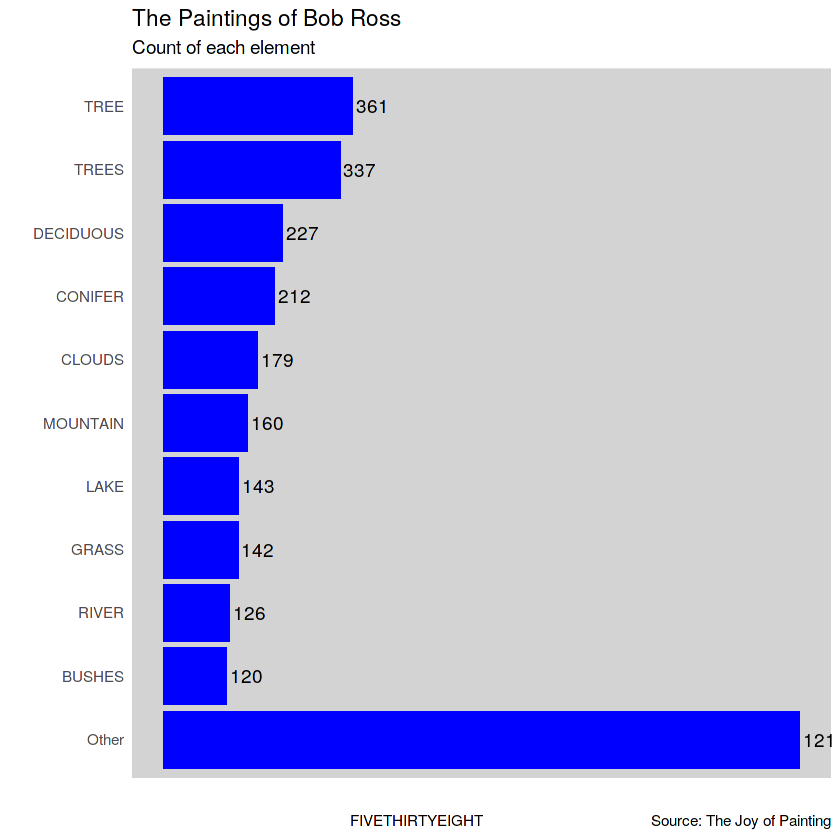

In [25]:
p = ggplot(longVersion, aes(x=Category))
p = p + geom_bar(fill = "blue")
p = p + geom_text(stat='count', aes(label=..count..),hjust=-.1)
p = p + labs(title = "The Paintings of Bob Ross", 
             subtitle="Count of each element", 
             caption="FIVETHIRTYEIGHT       \t\t\t                                Source: The Joy of Painting",
             x="", 
             y="")

p = p + theme(
              panel.background = element_rect(fill = "#d3d3d3", size = 5),
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.border = element_blank(),
              axis.ticks = element_blank(),
              axis.text.x=element_blank())
p = p + coord_flip()
p